### **ABSTRACT**

Stroke is a medical disorder in which the blood arteries in the brain are ruptured, causing damage to the brain. When the supply of blood and other nutrients to the brain is interrupted, symptoms might develop. According to the World Health Organization (WHO), stroke is the greatest cause of death and disability globally. Early recognition of the various warning signs of a stroke can help reduce the severity of the stroke.

Stroke occurs when the blood flow to various areas of the brain is disrupted or diminished, resulting in the cells in those areas of the brain not receiving the nutrients and oxygen they require and dying. A stroke is a medical emergency that requires urgent medical attention. Early detection and appropriate management are required to prevent further damage to the affected area of the brain and other complications in other parts of the body.

The World Health Organization (WHO) estimates that 15 million people worldwide suffer from strokes each year, with one person dying every 4-5 minutes in the affected population. Stroke is the 16 leading cause of mortality in the United States according to the Centers for Disease Control and Prevention (CDC) [1]. Stroke is a noncommunicable disease that kills approximately 11% of the population.

In this project, I am working on stroke dataset. Here AutoMLH20 and Logistic Regression library is used for analysis. 

Source- https://pubmed.ncbi.nlm.nih.gov/34868531/




### **OBJECTIVE**


Determine what makes a person at risk for stroke.

Clean data and create a machine learning model to perform early detection of stroke for patients.

In [796]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install seaborn
!pip install statsmodels

In [797]:
# Import libraries
# Use pip install or conda install if missing a library

import random, os, sys
import warnings
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [798]:
#For Pandas
df_pd=pd.read_csv('https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv')
df_pd.head()
df_pd_org=df_pd.copy(deep=True)

In [799]:
#First five rows
df_pd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [800]:
#Get Stats of all the columns
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are categorical variables as well as float numerical values in the dataset.

In [801]:
#Description of all the columns 
df_pd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 From the table above, we can see there are some missing vales for BMI
 The average age is 43.
 The average bmi is 28
 The minimum age is questionable.
 Average glucose level is 106

In [802]:
df_pd.shape

(5110, 12)

We can see here the shape of the dataset is (5110,12)

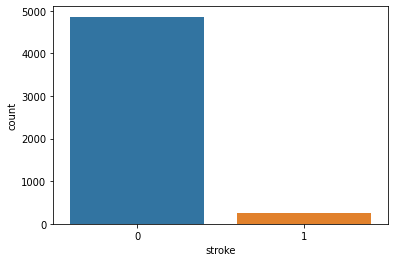

In [803]:
sns.countplot(x='stroke',data=df_pd_org)

We can see that there is an imbalance for the number of stroke predictions. There are much more 0's than 1's

Text(0.5, 1.0, 'Relationship between Age and Stroke')

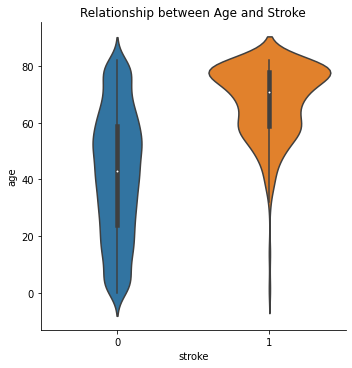

In [804]:
#Relation between age and stroke
sns.catplot('stroke','age',data=df_pd_org,kind='violin')
plt.title('Relationship between Age and Stroke')

 From the diagram above, we can see age is an important factor in predicting stroke. With the increase in age, the changes of stroke increases

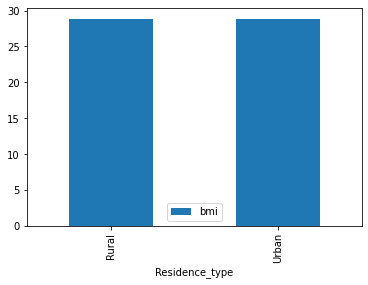

In [805]:
df_pd_org[['Residence_type','bmi']].groupby('Residence_type').mean('bmi').plot(kind='bar') # Relation residence type and BMI


 BMI is not varying for Rural and Urban

Text(0.5, 1.0, 'Relationship between glucose level and work type')

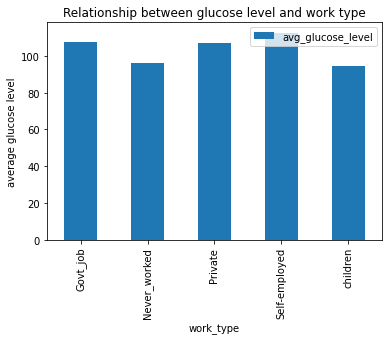

In [806]:
df_pd_org[['work_type','avg_glucose_level']].groupby('work_type').mean('avg_glucose_level').plot(kind='bar')
plt.ylabel('average glucose level')
plt.title('Relationship between glucose level and work type')

No significant result found


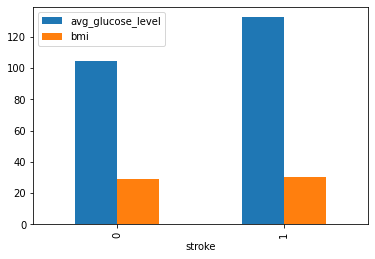

In [807]:
# Relation for stroke with bmi and average
df_pd_org[['stroke','avg_glucose_level','bmi']].groupby('stroke').mean(['bmi','avg_glucose_level']).plot(kind='bar')

Average glucose level is more with heart patients. No significant variation found for BMI.

Text(0.5, 1.1, 'Stroke and Smoking behaviour')

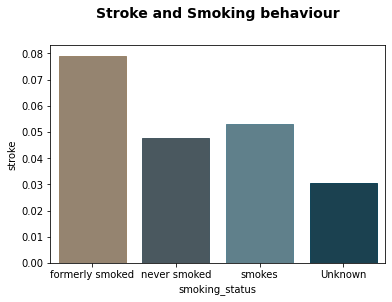

In [808]:
palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
ax = sns.barplot(data=df_pd_org, x='smoking_status', y='stroke',
            palette=palettes, edgecolor=palettes, ci=None)

ax.set_title('Stroke and Smoking behaviour', y=1.1, weight='bold', fontsize=14)

One who smokes or has formerly smoked may have a higher risk of stroke

Text(0.5, 1.0, 'Gender wise stroke count')

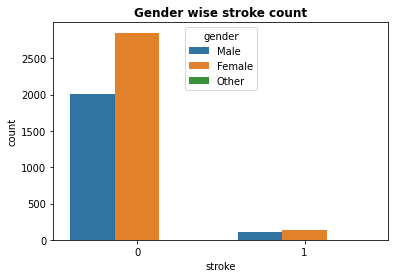

In [809]:
sns.countplot(x='stroke',data=df_pd_org,hue='gender')
plt.title('Gender wise stroke count',fontweight='bold')

We can see that males are at a higher risk than females

In [810]:
#Find the correlation
corr_matrix = df_pd_org.corr()
corr_matrix



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


It can be seen that age plays an important factor in stroke with a correlation factor of 0.25. Average glucose level, heart disease and hypertension also play an important role.

In [811]:
 # Find how much each attribue correlates to Stroke
 corr_matrix["stroke"].sort_values(ascending=False)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

Age, heart_disease. glucose level and hypertension may play a significant role in stroke prediction

In [812]:
df_pd.dropna(inplace=True) # vif can't be calculated with nan values
df_pd = df_pd._get_numeric_data() # drop non-numeric cols




In [813]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df_pd[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


,variables,VIF
0,age,5.831218
1,hypertension,1.187969
2,heart_disease,1.139760
3,avg_glucose_level,6.069581
4,bmi,8.162154


 They may be some collinearity as age, avg glucose level and BMI as their VIF is high

In [814]:
df_pd_org=df_pd_org.drop('id',axis=1,inplace=False)
df_pd_org.corr(method='pearson')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Distributions for the numerical variables

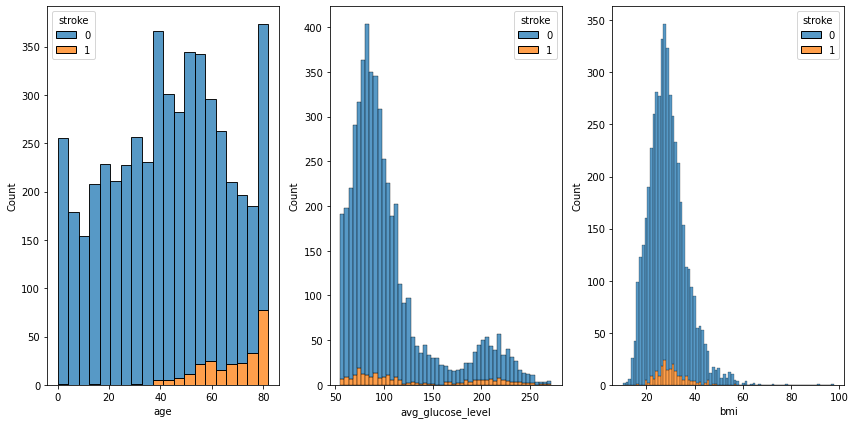

In [815]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.histplot(data=df_pd_org, x=col, hue='stroke', multiple='stack', ax=ax[i])

plt.tight_layout()
plt.show()

Average_Glucose_Level and BMI seems to have a right skewed form

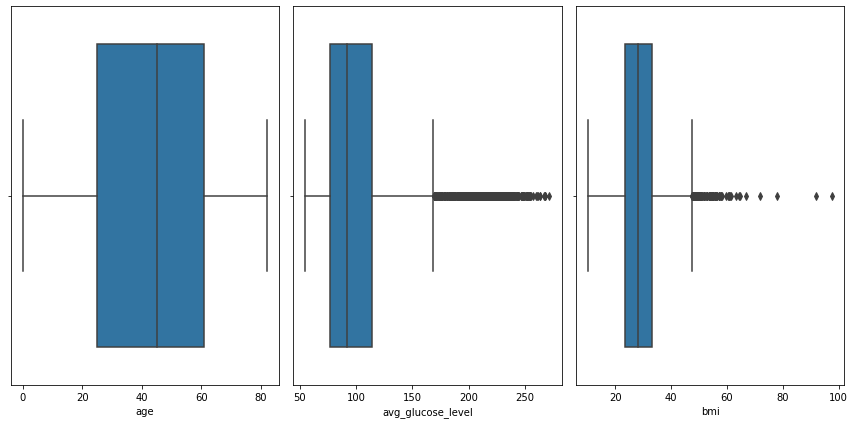

In [816]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.boxplot(data=df_pd_org, x=col, ax=ax[i])

plt.tight_layout()
plt.show()

There may be some outliers for avg_glucose_level and bmi

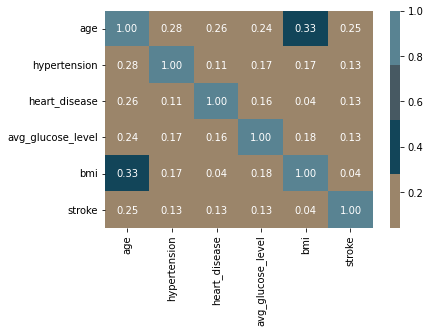

In [817]:
#from IPython.core.pylabtools import figsize
#f,ax=plt.subplots(figsize=(6,6))
#sns.heatmap(df_pd_org.corr(),center=0, linewidths=0.8,cmap='Greens',annot=True)
from matplotlib import colors
cmap = colors.ListedColormap(['#9B856A', '#124559', '#475962', '#598392'])
sns.heatmap(df_pd_org.corr(), annot=True, fmt='.2f', cmap=cmap)


ID has no role to predict stroke. Furthermore, correlation between age and stroke is high as well as age and BMI


In [818]:
data_onehot=pd.get_dummies(df_pd_org, prefix=None, dummy_na=False, columns=['gender','ever_married','work_type', 'Residence_type','smoking_status'], sparse=False, drop_first=True, dtype=None)
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


One hot encoding for categorical data.

In [819]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_onehot = pd.DataFrame(imputer.fit_transform(data_onehot),columns = data_onehot.columns)

KNN imputation to fill values for BMI.

In [820]:
data_onehot.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.939002,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.763201,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.200000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Missing values filled for BMI.

In [821]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_stroke=data_onehot['stroke']
X_prep = data_onehot.drop(columns=['stroke'], inplace=False)
X_input = pd.DataFrame(data=scaler.fit_transform(X_prep), index=X_prep.index, columns=X_prep.columns)

Applied Min Max scalar to the inputs to balance the data and reduce effects of the ranges of variables.

In [822]:
X_input.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.254983,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [823]:
df_pd_org['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

We can see that the number of positive stroke prediction in the whole data is much less than the negative stroke prediction. We can assume our model shall be struggling with the training as it is not exposed to much equally sampled data i.e the data has much more 0's than 1's

In [824]:
x_infea=data_onehot.drop(columns='stroke')
y_outfea=data_onehot['stroke']

In [825]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
x_train_in,x_test_in,y_train_out,y_test_out=train_test_split(x_infea,y_outfea,test_size=0.2,random_state=421)


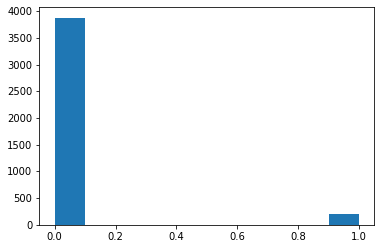

In [826]:
plt.hist(y_train_out);

No of ones are very less. Hence there is an imbalance in the output. We can use SMOTE to balance.

            age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     63.000000      0.000000       0.000000         231.690000  56.100000   
1     61.000000      0.000000       0.000000          87.520000  23.700000   
2     50.000000      0.000000       0.000000         120.050000  27.400000   
3     22.000000      0.000000       0.000000         103.560000  25.100000   
4     71.000000      0.000000       0.000000          56.120000  24.700000   
...         ...           ...            ...                ...        ...   
7751  80.913774      1.000000       0.913774         249.958756  28.005151   
7752  53.226181      1.000000       0.000000         178.314491  28.319055   
7753  82.000000      0.228668       0.228668          86.027751  28.813997   
7754  72.817508      0.000000       0.000000          98.177515  26.368620   
7755  78.000000      0.781317       0.000000         131.119511  20.865392   

      gender_Male  gender_Other  ever_married_Yes  work_type_Ne

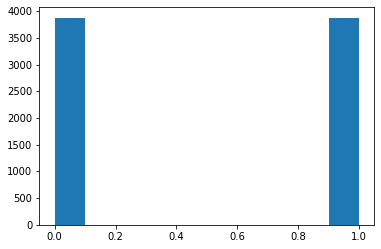

In [827]:
from imblearn.over_sampling import SMOTE
mod=SMOTE()
x_train1,y_train1=mod.fit_resample(x_train_in,y_train_out)
plt.hist(y_train1);
print(x_train1)

We have balanced number here and we can apply regression again.

In [828]:
#Applying Logistic Regression
#Apply l1 penalty
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#lg=LogisticRegression(max_iter=500,penalty='l1',solver='liblinear',C=3.0)
lg=LogisticRegression()
lg.fit(x_train1,y_train1)
print(confusion_matrix(y_test_out,lg.predict(x_test_in)))
print(classification_report(y_test_out,lg.predict(x_test_in)))
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, lg.predict(x_test_in), average='weighted'))
print("Recall")
(recall_score(y_test_out, lg.predict(x_test_in), average='macro'))

[[739 244]
 [ 11  28]]
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85       983
         1.0       0.10      0.72      0.18        39

    accuracy                           0.75      1022
   macro avg       0.54      0.73      0.52      1022
weighted avg       0.95      0.75      0.83      1022

F1 Score:
0.827182259438836
Recall


0.7348644912225787

In [829]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out,lg.predict_proba(x_test_in)[:,1])

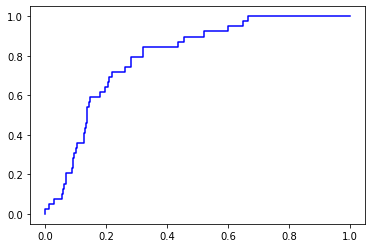

In [830]:
plt.plot(fpr,tpr,color='blue',label='logistic')

# The recall is good with l1 penalty and the accuracy is good

### Lets train and test the models by dropping the unimportant variables like work type and residence

In [831]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.60,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,32.56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.50,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [832]:
data_dropped=data_onehot.copy(deep=True)

In [833]:
data_dropped=data_dropped.drop(['gender_Male','bmi', 'gender_Other', 'ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children','Residence_type_Urban' ], axis=1)

In [834]:
data_dropped.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,1.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,1.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,1.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,1.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,1.0,0.0,1.0,0.0


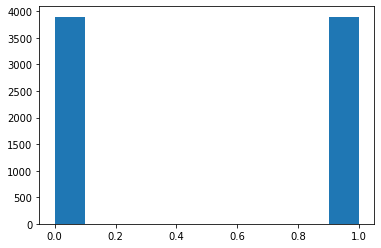

In [835]:
x_infea3=data_dropped.drop(columns='stroke')
y_outfea3=data_dropped['stroke']
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(x_infea3,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [836]:
y_train4.value_counts()

0.0    3899
1.0    3899
Name: stroke, dtype: int64

## Now lets test on scaled data 

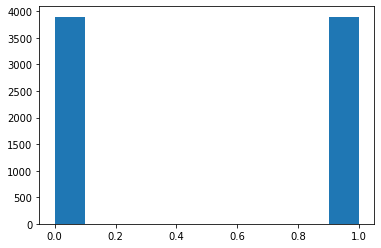

In [837]:
x_infea3=data_dropped.drop(columns='stroke')
y_outfea3=data_dropped['stroke']
scaler = MinMaxScaler()
scaler.fit(x_infea3)
X_scaled = scaler.transform(x_infea3)
X = pd.DataFrame(X_scaled, columns=x_infea3.columns)
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(X,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [838]:
best_clf2=LogisticRegression()
best_clf2.fit(x_train4, y_train4)

print(best_clf2.coef_, best_clf2.intercept_)

[[ 6.42421102  0.36611481  0.19817073  0.82411171 -0.18109753 -0.32982823
   0.09781182]] [-4.69150611]


Again we can see that age has a high importance here in predicting stroke

In [839]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.773


In [840]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
from sklearn.metrics import recall_score
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))


[[706 256]
 [  9  51]]
              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84       962
         1.0       0.17      0.85      0.28        60

    accuracy                           0.74      1022
   macro avg       0.58      0.79      0.56      1022
weighted avg       0.94      0.74      0.81      1022

F1 Score:
0.8088652108051193
Recall


0.7407045009784736

Dropping unimportant variables does not make a great difference in F1 score but yes it has significantlty increased

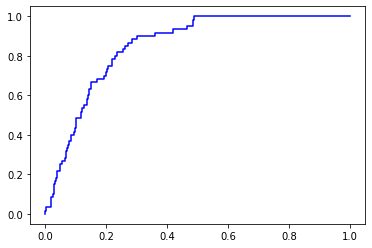

In [841]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out3,best_clf2.predict_proba(x_test_in3)[:,1])
plt.plot(fpr,tpr,color='blue',label='logistic')

Recall on Stroke prediction is good. We have more number of predicting positive stroke and that is great here


### Recall and F1 score is good. Seems to be a good model

In [842]:
data_feature=pd.get_dummies(df_pd_org, prefix=None, dummy_na=False, columns=['gender','ever_married','work_type', 'Residence_type','smoking_status'], sparse=False, drop_first=True, dtype=None)
data_feature.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [843]:
data_feature.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are missing values for BMI

 To fix the missing values in the BMI columns we use a imputation technics based on the KNN.

In [844]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_feature = pd.DataFrame(scaler.fit_transform(data_feature), columns = data_feature.columns)
df_feature.head()
df_feature_impute=df_feature.copy(deep=True)

In [845]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_feature = pd.DataFrame(imputer.fit_transform(df_feature),columns = df_feature.columns)

In [846]:
df_feature.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Now BMI has no missing values

In [847]:
from imblearn.over_sampling import SMOTE
X , y = df_feature.drop(columns='stroke'),df_feature["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7788, 16)
After OverSampling, the shape of train_y: (7788,) 

After OverSampling, counts of label '1': 3894
After OverSampling, counts of label '0': 3894


Sampling has balanced our data.

In [848]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.183734,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.210767,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,0.987793,0.0,0.0,0.323516,0.340206,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,0.426270,0.0,0.0,0.128658,0.232532,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.621582,0.0,0.0,0.513203,0.175258,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [849]:
y_res.value_counts()


0.0    3894
1.0    3894
Name: stroke, dtype: int64

In [850]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
lg=LogisticRegression(max_iter=500,penalty='l1',solver='liblinear',C=3.0)
#lg=LogisticRegression()
lg.fit(X_res,y_res)
print(confusion_matrix(y_test,lg.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print('Validation Acuuracy: ',accuracy_score(y_test,lg.predict(x_test)))
print('Training Accuracy: ',accuracy_score(y_res,lg.predict(X_res)))
print("F1 Score:")
print(f1_score(y_test, lg.predict(x_test), average='weighted'))
print("Recall")
(recall_score(y_test, lg.predict(x_test), average='macro'))


[[687 280]
 [ 13  42]]
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82       967
         1.0       0.13      0.76      0.22        55

    accuracy                           0.71      1022
   macro avg       0.56      0.74      0.52      1022
weighted avg       0.94      0.71      0.79      1022

Validation Acuuracy:  0.713307240704501
Training Accuracy:  0.7937853107344632
F1 Score:
0.7918689186215558
Recall


0.7370405189433111

No significant chabge in accuracy after filling BMI.

In [851]:
df_feature.describe()
df_feature_copy=df_feature.copy(deep=True)
df_feature_copy.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.526692,0.097456,0.054012,0.235563,0.213541,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,0.276033,0.296607,0.226063,0.209046,0.088847,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304199,0.000000,0.000000,0.102137,0.153494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.548340,0.000000,0.000000,0.169721,0.205040,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.743652,0.000000,0.000000,0.272228,0.261168,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Removing *Outliers*

In [852]:
cols = ['age','avg_glucose_level','bmi'] # one or more

Q1 = df_feature[cols].quantile(0.25)
Q3 = df_feature[cols].quantile(0.75)
IQR = Q3 - Q1

df_feature = df_feature[~((df_feature[cols] < (Q1 - 1.5 * IQR)) |(df_feature[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


Removed outliers

In [853]:
df_feature.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.498069,0.074125,0.039109,0.167866,0.200990,0.037517,0.409504,0.000227,0.622783,0.005002,0.565257,0.150523,0.153479,0.507958,0.161210,0.362892,0.152569
std,0.275129,0.262003,0.193876,0.104637,0.076112,0.190047,0.491798,0.015079,0.484745,0.070558,0.495780,0.357624,0.360489,0.499994,0.367766,0.480889,0.359613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279785,0.000000,0.000000,0.092108,0.146621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511719,0.000000,0.000000,0.151971,0.198167,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.707031,0.000000,0.000000,0.225741,0.249714,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.524236,0.421535,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that we have removed the outliers here.

In [854]:
from imblearn.over_sampling import SMOTE
X , y = df_feature.drop(columns='stroke'),df_feature["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=26)
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

Smote to balance the data.

In [855]:
X


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.902344,1.0,1.0,0.069107,0.195876,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.841309,0.0,0.0,0.181285,0.143184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.719238,0.0,0.0,0.097082,0.201604,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.951172,0.0,0.0,0.015927,0.159221,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.210767,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,0.987793,0.0,0.0,0.323516,0.340206,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,0.426270,0.0,0.0,0.128658,0.232532,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.621582,0.0,0.0,0.513203,0.175258,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [856]:
y_res.value_counts()


0.0    3387
1.0    3387
Name: stroke, dtype: int64

In [857]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
lg=LogisticRegression(max_iter=500,penalty='l1',solver='liblinear',C=3.0)
#lg=LogisticRegression()
lg.fit(X_res,y_res)
print(confusion_matrix(y_test,lg.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print('Validation Acuuracy: ',accuracy_score(y_test,lg.predict(x_test)))
print('Training Accuracy: ',accuracy_score(y_res,lg.predict(X_res)))
print("F1 Score:")
print(f1_score(y_test, lg.predict(x_test), average='weighted'))
print("Recall")
(recall_score(y_test, lg.predict(x_test), average='macro'))


[[649 197]
 [  9  25]]
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86       846
         1.0       0.11      0.74      0.20        34

    accuracy                           0.77       880
   macro avg       0.55      0.75      0.53       880
weighted avg       0.95      0.77      0.84       880

Validation Acuuracy:  0.7659090909090909
Training Accuracy:  0.7810746973723058
F1 Score:
0.8372336647727273
Recall


0.7512167987762481

F1 score, recall and accuracy improved after removing outliers

In [858]:
df_feature_impute_standard=df_feature_copy.copy(deep=True)
df_feature_impute_standard.describe()



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.526692,0.097456,0.054012,0.235563,0.213541,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,0.276033,0.296607,0.226063,0.209046,0.088847,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304199,0.000000,0.000000,0.102137,0.153494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.548340,0.000000,0.000000,0.169721,0.205040,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.743652,0.000000,0.000000,0.272228,0.261168,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [859]:
df_feature_impute_standard['bmi'].describe()

count    5110.000000
mean        0.213541
std         0.088847
min         0.000000
25%         0.153494
50%         0.205040
75%         0.261168
max         1.000000
Name: bmi, dtype: float64

## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods

In [860]:
df_bmi = df_feature_impute_standard[['bmi']]
df_bmi['bmi_copy_1_percent'] = df_bmi[['bmi']]
df_bmi['bmi_copy_5_percent'] = df_bmi[['bmi']]
df_bmi['bmi_copy_10_percent'] = df_bmi[['bmi']]
df_bmi['sample_bmi'] = df_feature_impute_standard[['bmi']]
df_bmi['sample_bmi'] = df_bmi['sample_bmi']/1000
df_bmi

,bmi,bmi_copy_1_percent,bmi_copy_5_percent,bmi_copy_10_percent,sample_bmi
0,0.301260,0.301260,0.301260,0.301260,0.000301
1,0.183734,0.183734,0.183734,0.183734,0.000184
2,0.254296,0.254296,0.254296,0.254296,0.000254
3,0.276060,0.276060,0.276060,0.276060,0.000276
4,0.156930,0.156930,0.156930,0.156930,0.000157
...,...,...,...,...,...
5105,0.210767,0.210767,0.210767,0.210767,0.000211
5106,0.340206,0.340206,0.340206,0.340206,0.000340
5107,0.232532,0.232532,0.232532,0.232532,0.000233
5108,0.175258,0.175258,0.175258,0.175258,0.000175


In [861]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [862]:
print(get_percent_missing(df_bmi))


                             column_name  percent_missing
bmi                                  bmi              0.0
bmi_copy_1_percent    bmi_copy_1_percent              0.0
bmi_copy_5_percent    bmi_copy_5_percent              0.0
bmi_copy_10_percent  bmi_copy_10_percent              0.0
sample_bmi                    sample_bmi              0.0


In [863]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [864]:
create_missing(df_bmi, 0.01, 'bmi_copy_1_percent')
create_missing(df_bmi, 0.05, 'bmi_copy_5_percent')
create_missing(df_bmi, 0.1, 'bmi_copy_10_percent')

In [865]:
print(get_percent_missing(df_bmi))

                             column_name  percent_missing
bmi                                  bmi         0.000000
bmi_copy_1_percent    bmi_copy_1_percent         0.998043
bmi_copy_5_percent    bmi_copy_5_percent         5.009785
bmi_copy_10_percent  bmi_copy_10_percent        10.000000
sample_bmi                    sample_bmi         0.000000


In [866]:
# Store Index of NaN values in each coloumns
bmi_1_idx = list(np.where(df_bmi['bmi_copy_1_percent'].isna())[0])
bmi_5_idx = list(np.where(df_bmi['bmi_copy_5_percent'].isna())[0])
bmi_10_idx = list(np.where(df_bmi['bmi_copy_10_percent'].isna())[0])

In [867]:
print(f"Length of bmi_1_idx is {len(bmi_1_idx)} and it contains {(len(bmi_1_idx)/len(df_bmi['bmi_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_1_percent'])}")

Length of bmi_1_idx is 51 and it contains 0.9980430528375734% of total data in column | Total rows: 5110


In [868]:
print(f"Length of bmi_5_idx is {len(bmi_5_idx)} and it contains {(len(bmi_5_idx)/len(df_bmi['bmi_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_5_percent'])}")

Length of bmi_5_idx is 256 and it contains 5.009784735812133% of total data in column | Total rows: 5110


In [869]:
print(f"Length of bmi_10_idx is {len(bmi_10_idx)} and it contains {(len(bmi_10_idx)/len(df_bmi['bmi_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_10_percent'])}")

Length of bmi_10_idx is 511 and it contains 10.0% of total data in column | Total rows: 5110


## Imputation using KNN 

In [870]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_bmi_df = pd.DataFrame(imputer.fit_transform(df_bmi1), columns = df_bmi1.columns)

In [871]:
imputed_bmi_df.sample(10)

,sample_bmi,bmi_copy_10_percent
2226,0.000134,0.134021
157,0.000309,0.309278
580,0.000218,0.217640
1050,0.000187,0.186712
1909,0.000269,0.269187
4764,0.000061,0.060710
902,0.000222,0.222222
3595,0.000184,0.184422
3482,0.000151,0.151203
2360,0.000293,0.293242


In [872]:
print(get_percent_missing(imputed_bmi_df))

                             column_name  percent_missing
sample_bmi                    sample_bmi              0.0
bmi_copy_10_percent  bmi_copy_10_percent              0.0


In [873]:
imputed_bmi_df['original'] = df_bmi['bmi']

10 percent KNN


In [874]:
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_10_percent']

In [875]:
for i in bmi_10_idx:
    print(str(imputed_bmi_df['bmi_copy_10_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

0.19587628865979378, 0.19587628865979378, 0.0
0.3150057273768614, 0.3150057273768614, 0.0
0.2268957617411226, 0.2270332187857961, 0.00013745704467349462
0.13631156930126004, 0.13631156930126004, 0.0
0.29965635738831614, 0.30011454753722794, 0.00045819014891179677
0.25773195876288657, 0.25773195876288657, 0.0
0.3447880870561283, 0.3447880870561283, 0.0
0.24398625429553267, 0.24398625429553267, 0.0
0.13058419243986252, 0.13058419243986252, 0.0
0.3878579610538374, 0.3871706758304697, -0.0006872852233676952
0.35738831615120276, 0.35738831615120276, 0.0
0.2405498281786942, 0.2405498281786942, 0.0
0.11225658648339062, 0.11225658648339064, 1.3877787807814457e-17
0.29965635738831614, 0.30011454753722794, 0.00045819014891179677
0.19702176403207333, 0.19702176403207333, 0.0
0.1809851088201604, 0.1809851088201604, 0.0
0.19702176403207333, 0.19702176403207333, 0.0
0.4052691867124857, 0.4054982817869416, 0.00022909507445589838
0.22451317296678122, 0.22497136311569302, 0.00045819014891179677
0.21965

In [876]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0


for i in bmi_10_idx:
    diff10 = abs(imputed_bmi_df['bmi_copy_10_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_10.append(diff10)
print("Array of differences: ")
print(bmi_diff_10)
print("Length of Array: " + str(len(bmi_diff_10)))
print("Sum of Differences: ")
print(sum(abs(number) for number in bmi_diff_10))

Array of differences: 
[0.0, 0.0, 0.00013745704467349462, 0.0, 0.00045819014891179677, 0.0, 0.0, 0.0, 0.0, 0.0006872852233676952, 0.0, 0.0, 1.3877787807814457e-17, 0.00045819014891179677, 0.0, 0.0, 0.0, 0.00022909507445589838, 0.00045819014891179677, 0.00018327605956472426, 0.00022909507445587063, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00022909507445589838, 0.0, 0.0, 0.0, 0.0, 0.00022909507445589838, 0.0, 0.0, 0.00022909507445589838, 0.0, 1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.00022909507445589838, 0.0, 0.0, 2.7755575615628914e-17, 0.0020618556701030855, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0011454753722794364, 1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

KNN performed well

5 percent KNN

In [877]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_5_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_bmi_df = pd.DataFrame(imputer.fit_transform(df_bmi1), columns = df_bmi1.columns)
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_5_percent']
for i in bmi_5_idx:
    print(str(imputed_bmi_df['bmi_copy_5_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                           column_name  percent_missing
sample_bmi                  sample_bmi              0.0
bmi_copy_5_percent  bmi_copy_5_percent              0.0
0.143184421534937, 0.143184421534937, 0.0
0.19473081328751435, 0.19427262313860255, -0.00045819014891179677
0.3310423825887744, 0.3310423825887744, 0.0
0.24169530355097363, 0.24146620847651773, -0.00022909507445589838
0.11454753722794961, 0.11454753722794962, 1.3877787807814457e-17
0.19129438717067582, 0.19129438717067582, 0.0
0.2027491408934708, 0.2027491408934708, 0.0
0.20847651775486825, 0.20847651775486825, 0.0
0.3447880870561283, 0.3447880870561283, 0.0
0.2714776632302406, 0.27124856815578463, -0.0002290950744559539
0.29983963344788084, 0.30011454753722794, 0.00027491408934710027
0.2726231386025201, 0.2726231386025201, 0.0
0.18785796105383734, 0.18808705612829324, 0.00022909507445589838
0.23711340206185566, 0.23711340206185566, 0.0
0.20733104238258876, 0.20733104238258876, 0.0
0.27720504009163804, 0.2772050400916380

In [878]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0

for i in bmi_5_idx:
    diff5 = abs(imputed_bmi_df['bmi_copy_5_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_5.append(diff5)

print(len(bmi_diff_5))
print("Sum : ")
print(sum(abs(number) for number in bmi_diff_5))

256
Sum : 
0.009484536082475167


1 percent KNN

In [879]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_1_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_bmi_df = pd.DataFrame(imputer.fit_transform(df_bmi1), columns = df_bmi1.columns)
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_1_percent']
for i in bmi_1_idx:
    print(str(imputed_bmi_df['bmi_copy_1_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                           column_name  percent_missing
sample_bmi                  sample_bmi              0.0
bmi_copy_1_percent  bmi_copy_1_percent              0.0
0.18341351660939292, 0.18373424971363114, 0.0003207331042382189
0.2142038946162658, 0.21420389461626577, -2.7755575615628914e-17
0.19014891179839633, 0.19014891179839633, 0.0
0.2623138602520046, 0.2623138602520046, 0.0
0.12256586483390611, 0.1225658648339061, -1.3877787807814457e-17
0.3848797250859106, 0.3848797250859106, 0.0
0.09621993127147767, 0.09621993127147767, 0.0
0.21534936998854529, 0.2148911798396335, -0.00045819014891179677
0.2520045819014891, 0.2520045819014891, 0.0
0.21878579610538376, 0.21878579610538373, -2.7755575615628914e-17
0.143184421534937, 0.143184421534937, 0.0
0.21764032073310427, 0.21764032073310424, -2.7755575615628914e-17
0.10309278350515465, 0.10309278350515465, 0.0
0.3922107674684995, 0.3917525773195877, -0.00045819014891179677
0.20618556701030927, 0.20618556701030927, 0.0
0.16723940435280638

In [880]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0

for i in bmi_1_idx:
    count +=1
    diff1 = abs(imputed_bmi_df['bmi_copy_1_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_1.append(diff1)

print(len(bmi_diff_1))
print("Sum: ")
print(sum(abs(number) for number in bmi_diff_1))

51
Sum: 
0.0016953035509737757


KNN nerarest neighbours performed pretty well in recovering the variables where the differences are minimal between original and imputed values

## Impute BMI recovery check using mean


In [881]:
df_feature_impute_standard['bmi'].describe()
df_bmi = df_feature_impute_standard[['bmi']]
df_bmi['bmi_copy_1_percent'] = df_bmi[['bmi']]
df_bmi['bmi_copy_5_percent'] = df_bmi[['bmi']]
df_bmi['bmi_copy_10_percent'] = df_bmi[['bmi']]
df_bmi['sample_bmi'] = df_feature_impute_standard[['bmi']]
df_bmi['sample_bmi'] = df_bmi['sample_bmi']/1000
df_bmi
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df
print(get_percent_missing(df_bmi))
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan
create_missing(df_bmi, 0.01, 'bmi_copy_1_percent')
create_missing(df_bmi, 0.05, 'bmi_copy_5_percent')
create_missing(df_bmi, 0.1, 'bmi_copy_10_percent')
print(get_percent_missing(df_bmi))
# Store Index of NaN values in each coloumns
bmi_1_idx = list(np.where(df_bmi['bmi_copy_1_percent'].isna())[0])
bmi_5_idx = list(np.where(df_bmi['bmi_copy_5_percent'].isna())[0])
bmi_10_idx = list(np.where(df_bmi['bmi_copy_10_percent'].isna())[0])
print(f"Length of bmi_1_idx is {len(bmi_1_idx)} and it contains {(len(bmi_1_idx)/len(df_bmi['bmi_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_1_percent'])}")
print(f"Length of bmi_5_idx is {len(bmi_5_idx)} and it contains {(len(bmi_5_idx)/len(df_bmi['bmi_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_5_percent'])}")
print(f"Length of bmi_10_idx is {len(bmi_10_idx)} and it contains {(len(bmi_10_idx)/len(df_bmi['bmi_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_10_percent'])}")

                             column_name  percent_missing
bmi                                  bmi              0.0
bmi_copy_1_percent    bmi_copy_1_percent              0.0
bmi_copy_5_percent    bmi_copy_5_percent              0.0
bmi_copy_10_percent  bmi_copy_10_percent              0.0
sample_bmi                    sample_bmi              0.0
                             column_name  percent_missing
bmi                                  bmi         0.000000
bmi_copy_1_percent    bmi_copy_1_percent         0.998043
bmi_copy_5_percent    bmi_copy_5_percent         5.009785
bmi_copy_10_percent  bmi_copy_10_percent        10.000000
sample_bmi                    sample_bmi         0.000000
Length of bmi_1_idx is 51 and it contains 0.9980430528375734% of total data in column | Total rows: 5110
Length of bmi_5_idx is 256 and it contains 5.009784735812133% of total data in column | Total rows: 5110
Length of bmi_10_idx is 511 and it contains 10.0% of total data in column | Total rows: 5110


5 percent Mean

In [882]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_5_percent']]
imputed_bmi_df = df_bmi1.fillna(df_bmi1.mean())
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_5_percent']
for i in bmi_5_idx:
    print(str(imputed_bmi_df['bmi_copy_5_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                           column_name  percent_missing
sample_bmi                  sample_bmi              0.0
bmi_copy_5_percent  bmi_copy_5_percent              0.0
0.21379804613146142, 0.13631156930126004, -0.07748647683020138
0.21379804613146142, 0.42611683848797255, 0.21231879235651113
0.21379804613146142, 0.20389461626575028, -0.009903429865711133
0.21379804613146142, 0.21099656357388316, -0.0028014825575782554
0.21379804613146142, 0.18327605956471937, -0.030521986566742043
0.21379804613146142, 0.24215349369988548, 0.028355447568424064
0.21379804613146142, 0.15922107674684993, -0.054576969384611485
0.21379804613146142, 0.23711340206185566, 0.023315355930394244
0.21379804613146142, 0.16838487972508592, -0.045413166406375494
0.21379804613146142, 0.24994272623138603, 0.03614468009992461
0.21379804613146142, 0.3046964490263459, 0.09089840289488449
0.21379804613146142, 0.24513172966781216, 0.03133368353635074
0.21379804613146142, 0.15257731958762885, -0.061220726543832565
0.213798046

In [883]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0



for i in bmi_5_idx:
    diff5 = abs(imputed_bmi_df['bmi_copy_5_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_5.append(diff5)


print(len(bmi_diff_5))
print("Sum: ")
print(sum(abs(number) for number in bmi_diff_5))

256
Sum: 
17.156876981986297


Mean difference can be high because of presence of Outliers in the data


10 percent Mean


In [884]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_10_percent']]
imputed_bmi_df = df_bmi1.fillna(df_bmi1.mean())
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_10_percent']
for i in bmi_10_idx:
    print(str(imputed_bmi_df['bmi_copy_10_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                             column_name  percent_missing
sample_bmi                    sample_bmi              0.0
bmi_copy_10_percent  bmi_copy_10_percent              0.0
0.2136484673320346, 0.2316151202749141, 0.017966652942879496
0.2136484673320346, 0.3115693012600229, 0.09792083392798831
0.2136484673320346, 0.13860252004581902, -0.07504594728621558
0.2136484673320346, 0.2696449026345934, 0.055996435302558795
0.2136484673320346, 0.3883161512027492, 0.1746676838707146
0.2136484673320346, 0.24856815578465064, 0.03491968845261603
0.2136484673320346, 0.20847651775486825, -0.0051719495771663515
0.2136484673320346, 0.2584192439862543, 0.04477077665421972
0.2136484673320346, 0.13631156930126004, -0.07733689803077456
0.2136484673320346, 0.15693012600229095, -0.056718341329743654
0.2136484673320346, 0.14432989690721648, -0.06931857042481812
0.2136484673320346, 0.20183276059564723, -0.011815706736387377
0.2136484673320346, 0.21191294387170678, -0.0017355234603278202
0.2136484673320346, 0.24

In [885]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0


for i in bmi_10_idx:
    diff10 = abs(imputed_bmi_df['bmi_copy_10_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_10.append(diff10)
print(len(bmi_diff_10))
print("Sum: ")
print(sum(abs(number) for number in bmi_diff_10))

511
Sum: 
33.042386225204254


1 percent mean


In [886]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_1_percent']]
imputed_bmi_df = df_bmi1.fillna(df_bmi1.mean())
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_1_percent']
for i in bmi_1_idx:
    print(str(imputed_bmi_df['bmi_copy_1_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                           column_name  percent_missing
sample_bmi                  sample_bmi              0.0
bmi_copy_1_percent  bmi_copy_1_percent              0.0
0.21364879530361947, 0.2270332187857961, 0.013384423482176638
0.21364879530361947, 0.12829324169530354, -0.08535555360831593
0.21364879530361947, 0.10080183276059566, -0.1128469625430238
0.21364879530361947, 0.16838487972508592, -0.04526391557853354
0.21364879530361947, 0.16609392898052694, -0.047554866323092526
0.21364879530361947, 0.5085910652920963, 0.29494226998847684
0.21364879530361947, 0.19473081328751435, -0.018917982016105117
0.21364879530361947, 0.2027491408934708, -0.010899654410148674
0.21364879530361947, 0.143184421534937, -0.07046437376868248
0.21364879530361947, 0.41008018327605955, 0.19643138797244009
0.21364879530361947, 0.143184421534937, -0.07046437376868248
0.21364879530361947, 0.23367697594501718, 0.02002818064139772
0.21364879530361947, 0.3894616265750286, 0.17581283127140912
0.21364879530361947, 0.

In [887]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0

for i in bmi_1_idx:
    count +=1
    diff1 = abs(imputed_bmi_df['bmi_copy_1_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_1.append(diff1)
print(len(bmi_diff_1))
print("Sum: ")
print(sum(abs(number) for number in bmi_diff_1))

51
Sum: 
3.3971717920972475


## Impute Check using median

In [888]:
df_feature_impute_standard['bmi'].describe()
df_bmi = df_feature_impute_standard[['bmi']]
df_bmi['bmi_copy_1_percent'] = df_bmi[['bmi']]
df_bmi['bmi_copy_5_percent'] = df_bmi[['bmi']]
df_bmi['bmi_copy_10_percent'] = df_bmi[['bmi']]
df_bmi['sample_bmi'] = df_feature_impute_standard[['bmi']]
df_bmi['sample_bmi'] = df_bmi['sample_bmi']/1000
df_bmi
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df
print(get_percent_missing(df_bmi))
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan
create_missing(df_bmi, 0.01, 'bmi_copy_1_percent')
create_missing(df_bmi, 0.05, 'bmi_copy_5_percent')
create_missing(df_bmi, 0.1, 'bmi_copy_10_percent')
print(get_percent_missing(df_bmi))
# Store Index of NaN values in each coloumns
bmi_1_idx = list(np.where(df_bmi['bmi_copy_1_percent'].isna())[0])
bmi_5_idx = list(np.where(df_bmi['bmi_copy_5_percent'].isna())[0])
bmi_10_idx = list(np.where(df_bmi['bmi_copy_10_percent'].isna())[0])
print(f"Length of bmi_1_idx is {len(bmi_1_idx)} and it contains {(len(bmi_1_idx)/len(df_bmi['bmi_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_1_percent'])}")
print(f"Length of bmi_5_idx is {len(bmi_5_idx)} and it contains {(len(bmi_5_idx)/len(df_bmi['bmi_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_5_percent'])}")
print(f"Length of bmi_10_idx is {len(bmi_10_idx)} and it contains {(len(bmi_10_idx)/len(df_bmi['bmi_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_bmi['bmi_copy_10_percent'])}")

                             column_name  percent_missing
bmi                                  bmi              0.0
bmi_copy_1_percent    bmi_copy_1_percent              0.0
bmi_copy_5_percent    bmi_copy_5_percent              0.0
bmi_copy_10_percent  bmi_copy_10_percent              0.0
sample_bmi                    sample_bmi              0.0
                             column_name  percent_missing
bmi                                  bmi         0.000000
bmi_copy_1_percent    bmi_copy_1_percent         0.998043
bmi_copy_5_percent    bmi_copy_5_percent         5.009785
bmi_copy_10_percent  bmi_copy_10_percent        10.000000
sample_bmi                    sample_bmi         0.000000
Length of bmi_1_idx is 51 and it contains 0.9980430528375734% of total data in column | Total rows: 5110
Length of bmi_5_idx is 256 and it contains 5.009784735812133% of total data in column | Total rows: 5110
Length of bmi_10_idx is 511 and it contains 10.0% of total data in column | Total rows: 5110


1 percent Median

In [889]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_1_percent']]
imputed_bmi_df = df_bmi1.fillna(df_bmi1.median())
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_1_percent']
for i in bmi_1_idx:
    print(str(imputed_bmi_df['bmi_copy_1_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                           column_name  percent_missing
sample_bmi                  sample_bmi              0.0
bmi_copy_1_percent  bmi_copy_1_percent              0.0
0.20504009163802978, 0.2316151202749141, 0.026575028636884324
0.20504009163802978, 0.19129438717067582, -0.013745704467353959
0.20504009163802978, 0.18671248568155785, -0.018327605956471926
0.20504009163802978, 0.17754868270332186, -0.027491408934707917
0.20504009163802978, 0.25544100801832764, 0.05040091638029787
0.20504009163802978, 0.1225658648339061, -0.08247422680412368
0.20504009163802978, 0.2027491408934708, -0.002290950744558984
0.20504009163802978, 0.12027491408934708, -0.0847651775486827
0.20504009163802978, 0.1512027491408935, -0.05383734249713629
0.20504009163802978, 0.3150057273768614, 0.10996563573883161
0.20504009163802978, 0.2302405498281787, 0.025200458190148933
0.20504009163802978, 0.1489117983963345, -0.05612829324169527
0.20504009163802978, 0.19473081328751435, -0.010309278350515427
0.2050400916380297

In [890]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0

for i in bmi_1_idx:
    count +=1
    diff1 = abs(imputed_bmi_df['bmi_copy_1_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_1.append(diff1)

print(len(bmi_diff_1))
print("Sum: ")
print(sum(abs(number) for number in bmi_diff_1))

51
Sum: 
2.921191294387169


Median performs better than mean when there are outliers

5 percent Median


In [891]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_5_percent']]
imputed_bmi_df = df_bmi1.fillna(df_bmi1.median())
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_5_percent']
for i in bmi_5_idx:
    print(str(imputed_bmi_df['bmi_copy_5_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                           column_name  percent_missing
sample_bmi                  sample_bmi              0.0
bmi_copy_5_percent  bmi_copy_5_percent              0.0
0.20618556701030927, 0.18373424971363114, -0.022451317296678125
0.20618556701030927, 0.3035509736540664, 0.09736540664375715
0.20618556701030927, 0.44215349369988544, 0.23596792668957617
0.20618556701030927, 0.2222222222222222, 0.016036655211912942
0.20618556701030927, 0.21534936998854526, 0.009163802978235991
0.20618556701030927, 0.24215349369988548, 0.03596792668957621
0.20618556701030927, 0.140893470790378, -0.06529209621993126
0.20618556701030927, 0.19702176403207333, -0.009163802978235935
0.20618556701030927, 0.19312714776632306, -0.013058419243986208
0.20618556701030927, 0.21947308132875146, 0.01328751431844219
0.20618556701030927, 0.20847651775486825, 0.002290950744558984
0.20618556701030927, 0.18671248568155785, -0.019473081328751418
0.20618556701030927, 0.20389461626575028, -0.002290950744558984
0.20618556701030

In [892]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0



for i in bmi_5_idx:
    diff5 = abs(imputed_bmi_df['bmi_copy_5_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_5.append(diff5)


print(len(bmi_diff_5))
print("Sum for 5 percent: ")
print(sum(abs(number) for number in bmi_diff_5))

256
Sum for 5 percent: 
16.45315005727373


10 percent Median


In [893]:
df_bmi1 = df_bmi[['sample_bmi','bmi_copy_10_percent']]
imputed_bmi_df = df_bmi1.fillna(df_bmi1.median())
imputed_bmi_df.sample(10)
print(get_percent_missing(imputed_bmi_df))
imputed_bmi_df['original'] = df_bmi['bmi']
imputed_bmi_df['diff'] = imputed_bmi_df['original'] - imputed_bmi_df['bmi_copy_10_percent']
for i in bmi_10_idx:
    print(str(imputed_bmi_df['bmi_copy_10_percent'][i])+", "+str(imputed_bmi_df['original'][i])+", "+str(imputed_bmi_df['diff'][i]))

                             column_name  percent_missing
sample_bmi                    sample_bmi              0.0
bmi_copy_10_percent  bmi_copy_10_percent              0.0
0.20504009163802978, 0.15693012600229095, -0.04810996563573883
0.20504009163802978, 0.19587628865979378, -0.009163802978235991
0.20504009163802978, 0.20504009163802978, 0.0
0.20504009163802978, 0.2398625429553265, 0.03482245131729672
0.20504009163802978, 0.44215349369988544, 0.23711340206185566
0.20504009163802978, 0.1512027491408935, -0.05383734249713629
0.20504009163802978, 0.14662084765177552, -0.058419243986254255
0.20504009163802978, 0.26689576174112256, 0.061855670103092786
0.20504009163802978, 0.22794959908361973, 0.02290950744558995
0.20504009163802978, 0.20389461626575028, -0.001145475372279492
0.20504009163802978, 0.19587628865979378, -0.009163802978235991
0.20504009163802978, 0.3871706758304697, 0.18213058419243994
0.20504009163802978, 0.20183276059564723, -0.0032073310423825496
0.20504009163802978, 0.19

In [894]:
# create list of difference bwtween imputed and orginal value

bmi_diff_1 = []
bmi_diff_5 = []
bmi_diff_10 = []
count = 0


for i in bmi_10_idx:
    diff10 = abs(imputed_bmi_df['bmi_copy_10_percent'][i] - df_bmi['bmi'][i])
    bmi_diff_10.append(diff10)
print("Sum for 10 perecent: ")
print(sum(abs(number) for number in bmi_diff_10))

Sum for 10 perecent: 
33.045360824742204


KNN here performs the best here since it has the minimum summation of differences. Then comes median and mean in order.

### IMPORTANT OBSERVATIONS

## What are the data types? (Only numeric and categorical)
Datatypes- id,age,avg_glucose_level, bmi are all numerical variables whereas gender, hypertension, heart_disease, work_type, residence_type, smoking_status, stroke are categorical variables

## Are there missing values?
There are missing values for BMI in the dataset. Rest of the values counts are balanced in the dataset.

## What are the likely distributions of the numeric variables?
The distribution of age is not significantly skewed wheres the avg_glucose_leven and BMI are slightly right skewed

## Which independent variables are useful to predict a target 
From the correlation, VIF and logistic coefficients, we can infer that age is the most important variable in predicting stroke. Also, hypertension and previous heart jstory disease plays a significant role in predicting stroke. Correlation between age and stroke is high(around 0.34)

## Which independent variables have missing data? How much? 
BMI has 3.94 percent of missing data in the dataset found by isna function

## Do the training and test sets have the same data?
The data is splitted into train and test sets. Train data has been scaled using MinMax Scalar here without touching the test dataset. Moreover, unimportant variables have been removed.

## In the predictor variables independent of all the other predictor variables?
From the VIF and correlation, it was found that the glucose level, bmi and age may have a significant correlation.

## Which predictor variables are the most important?
The most important predctor variables are age, bmi, hypertension and heart disease with a high correlation with stroke.

## Do the ranges of the predictor variables make sense?
Initially it doesn't but after processing, yes the ranges of the standard variables make sense. Though there are some outliers, they have been removed and then the values are handles used min-max scalar tranformation

## What are the distributions of the predictor variables?
The numerical predictor variables follows a normal distribution. Though the average glucose level and BMI shows some right skewness.

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?
Removing outliers significantly improved the F1 score and recall of logistic regression eg- F1 score went from 0.79 to 0.84

## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?
All the three methods recovered the missing data well. The methods used were KNN, dropping, mean and median imputation methods. Though median was better than mean when there were outliers present in the data.

Metrics:
[[647 199]
 [  9  25]]
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86       846
         1.0       0.11      0.74      0.19        34

    accuracy                           0.76       880
Validation Acuuracy:  0.7636363636363637
Training Accuracy:  0.7784174785946265
F1 Score:
0.8357197216021109
Recall
0.7500347656793214





## Conclusion

Age is the most important variable in the dataset. It has a high correlation factor too. Hypertension and heart disease also play a significant role. Recall has been great with logistic Regression here. Though accuracy is not that great, F1 and recall have improved after balancing the dataset and removing outliers. We can have False negative here but cannot afford false positive in case of heart attacks and thats why recall is important.

### **Citations**


https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://scikit-learn.org/stable/modules/grid_search.html

https://www.knowledgehut.com/tutorials/machine-learning/hyperparameter-tuning-machine-learning

https://www.geeksforgeeks.org/data-cleansing-introduction/

https://stackoverflow.com/questions/52739323/python-data-cleaning

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779




# **License**

MIT License

Copyright (c) 2022 trivedi-mi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
